# Weather Anomalies: Bethany Lazarus

In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00003927.dly', 'DALLAS FT WORTH AP.dly')

('DALLAS FT WORTH AP.dly', <http.client.HTTPMessage at 0x16edc4d9790>)

In [5]:
# get all historical data for New York, stacked into array

station = 'NEW YORK'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears])

In [6]:
# compute (TMIN + TMAX)/2, averaged over days in every year
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

In [7]:
allavg.shape

(140,)

In [8]:
np.where(allyears == 1945)

(array([65], dtype=int64),)

In [9]:
# find the index of values 1945 and 1955 in allyears
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [10]:
midcentury = np.nanmean(allavg[65:75])

In [11]:
midcentury

12.851438356164383

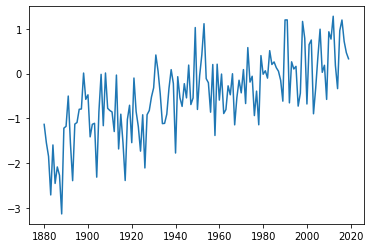

In [12]:
pp.plot(allyears, allavg - midcentury)

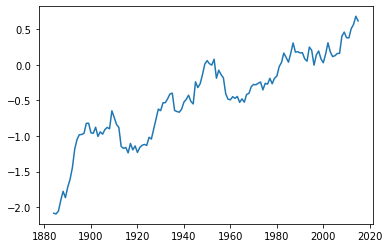

In [13]:
pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'))

In [14]:
# compute and plot the temperature anomaly time series for any station

allyears = np.arange(1880, 2020)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[71:81])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)

C:\Users\Owner\AppData\Local\Temp/ipykernel_20588/1577686165.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
C:\Users\Owner\AppData\Local\Temp/ipykernel_20588/1577686165.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
C:\Users\Owner\AppData\Local\Temp/ipykernel_20588/1577686165.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)


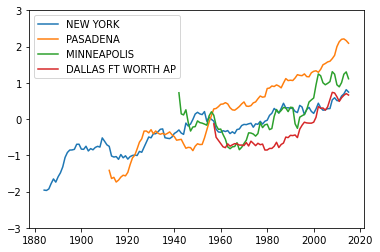

In [15]:
plotanomaly('NEW YORK')
plotanomaly('PASADENA')
plotanomaly('MINNEAPOLIS')
plotanomaly('DALLAS FT WORTH AP')

pp.legend()

In [17]:
# compute and plot the temperature anomaly time series for any station for between 1950-2020 (MODIFIED)

allyears = np.arange(1950, 2020)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[30:40])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)
    
    pp.title('Temperature Anomaly Time Series since 1950, created by Bethany Lazarus')

C:\Users\Owner\AppData\Local\Temp/ipykernel_20588/2902265028.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)


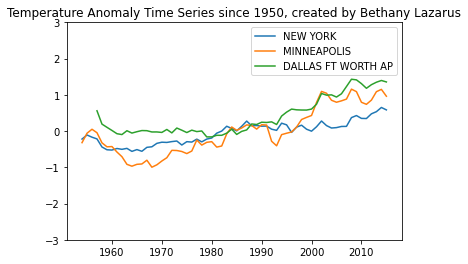

In [18]:
plotanomaly('NEW YORK')
plotanomaly('MINNEAPOLIS')
plotanomaly('DALLAS FT WORTH AP')

pp.legend()